# Project: 

## P1
Calculate the futures price for a coffee contract maturing in six months using the current spot price, the risk-free interest rate, and the estimated storage costs.

-	St: Spot price
-	r: Risk-free rate
-	d: Storage cost
-	T: Time to maturity 


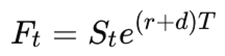

In [1]:
import numpy as np
def costCarry(St,r,d,T):
    Ft = St * np.exp((r+d)*T)
    print(f"The fair price of the coffee futures contract is ${Ft:.3f} per pound.")
    

In [2]:
T = 0.5 # 6 month in year
St = 1.20  # Spot price in dollars
r = 0.02  # Risk-free rate (2%)
d = 0.01  # Storage cost (1%)

costCarry(St,r,d,T)

The fair price of the coffee futures contract is $1.218 per pound.


## P2
Price a call option on a coffee futures contract using the current spot price, strike price, risk-free rate, time to maturity, and volatility.

-	C: Call option price
-	S0: Spot price
-	X: Strike price
-	r: Risk-free rate
-	T: Time to maturity
-	σ: Volatility


### Black-Scholes formula:
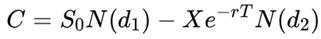

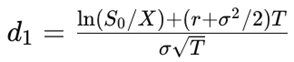

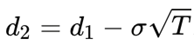

In [5]:
from scipy.stats import norm
def black_Scholes(S_0,X,r,T,sigma):
    d1 = (np.log(S_0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    print(f"The price of the call option is ${C:.3f}.")


In [6]:

S_0 = 1.20  # Spot price in dollars
X = 1.25  # Strike price in dollars
r = 0.02  # Risk-free rate (2%)
T = 0.5  # Time to maturity in years
sigma = 0.25  # Volatility (25%)

black_Scholes(S_0,X,r,T,sigma)


The price of the call option is $0.068.


## P3

Run simulations to forecast the price of coffee futures under different market conditions. Evaluate the impact of varying supply, demand, and weather scenarios.

### Monte-Carlo Simulation

In [7]:
num_simulations = 10000  
num_steps = 252  


dt = T / num_steps

np.random.seed(42)  
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S_0

for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    price_paths[t] = price_paths[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# Calculating the average simulated price at last
average_simulated_price = np.mean(price_paths[-1])
print(f"The average simulated price of the coffee futures contract at maturity is ${average_simulated_price:.3f}.")


The average simulated price of the coffee futures contract at maturity is $1.210.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(100):  
    plt.plot(price_paths[:, i], lw=0.5, alpha=0.6)
plt.plot(np.mean(price_paths, axis=1), 'k-', lw=2, label='Mean Path')
plt.title('Monte Carlo Simulation of Coffee Futures Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()